# 数据加载

In [1]:
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

train_we = np.load('../Semantics/data/train_we_(32193, 120).npy')
test_we = np.load('../Semantics/data/test_we_(1613, 120).npy')
we_emb_matrix = np.load(
    '../Semantics/data/we_embedding_matrix_(6000, 300).npy')

y_fake_train = np.load('../dataset/data/train_label_(32193, 2).npy')
y_fake_test = np.load('../dataset/data/test_label_(1613, 2).npy')

y_category_train = np.load(
    '../dataset/data/train_category_label_(32193, 8).npy')
y_category_test = np.load('../dataset/data/test_category_label_(1613, 8).npy')

train_we.shape, test_we.shape, y_fake_train.shape, y_fake_test.shape, y_category_train.shape, y_category_test.shape

((32193, 120), (1613, 120), (32193, 2), (1613, 2), (32193, 8), (1613, 8))

# end2end model: EANN/DANN

## BiGRU

In [2]:
from TextTransferModels import End2endBiGRU
from train import train

model = End2endBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py




Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 120, 64)      63936       embedding_1[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_1 (Glo (None, 64)           0  

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 120, 64)      63936       embedding_3[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_3 (Glo (None, 64)           0           bidirectional_3[0][0]            
__________________________________________________________________________________________________
global_max

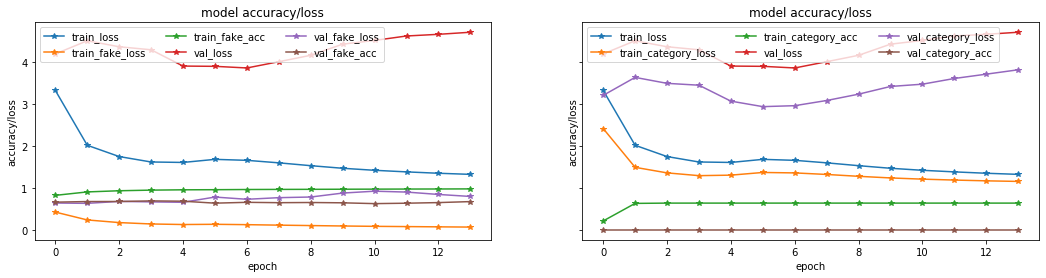


TEST_sz: 1613

Accuracy: 0.6931184128952262

              precision    recall  f1-score   support

       truth      0.651     0.958     0.775       891
       rumor      0.877     0.366     0.516       722

   micro avg      0.693     0.693     0.693      1613
   macro avg      0.764     0.662     0.646      1613
weighted avg      0.752     0.693     0.659      1613
 samples avg      0.693     0.693     0.693      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [4]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='End2endBiGRU', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=True)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 120, 64)      63936       embedding_2[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_2 (Glo (None, 64)           0           bidirectional_2[0][0]            
__________________________________________________________________________________________________
global_max

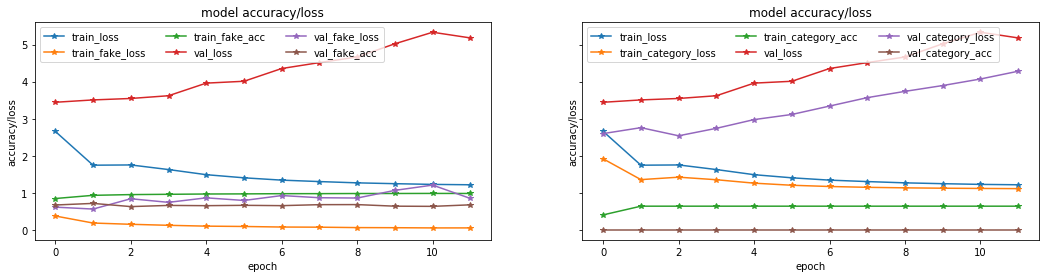


TEST_sz: 1613

Accuracy: 0.7154370737755734

              precision    recall  f1-score   support

       truth      0.674     0.941     0.785       891
       rumor      0.856     0.438     0.579       722

   micro avg      0.715     0.715     0.715      1613
   macro avg      0.765     0.689     0.682      1613
weighted avg      0.755     0.715     0.693      1613
 samples avg      0.715     0.715     0.715      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [3]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='End2endBiGRU2', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128, multi_output=True)

In [ ]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='End2endBiGRU3', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128, multi_output=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 120, 64)      63936       embedding_3[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_3 (Glo (None, 64)           0           bidirectional_3[0][0]            
__________________________________________________________________________________________________
global_max

In [ ]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='End2endBiGRU4', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128, multi_output=True)

In [ ]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='End2endBiGRU5', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128, multi_output=True)

## TextCNN

In [2]:
from TextTransferModels import End2endTextCNN
from train import train

model = End2endTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py





Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 118, 256)     230656      embedding_1[0][0]                
_______________________________________

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 118, 256)     230656      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 117, 256)     307456      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (

32193/32193 [==============================] - 4s 113us/step - loss: 5.8570 - fake_loss: 0.0954 - category_loss: 5.6927 - fake_acc: 0.9633 - category_acc: 0.6301 - val_loss: 16.8365 - val_fake_loss: 0.6844 - val_category_loss: 16.0830 - val_fake_acc: 0.7030 - val_category_acc: 0.0000e+00
Epoch 13/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.9313 - fake_loss: 0.0840 - category_loss: 5.7798 - fake_acc: 0.9687 - category_acc: 0.6365 - val_loss: 17.0119 - val_fake_loss: 0.8618 - val_category_loss: 16.0836 - val_fake_acc: 0.6603 - val_category_acc: 0.0000e+00
Epoch 14/100
32193/32193 [==============================] - 4s 110us/step - loss: 5.9356 - fake_loss: 0.0774 - category_loss: 5.7939 - fake_acc: 0.9710 - category_acc: 0.6404 - val_loss: 16.9673 - val_fake_loss: 0.8214 - val_category_loss: 16.0836 - val_fake_acc: 0.6708 - val_category_acc: 0.0000e+00
Epoch 15/100
32193/32193 [==============================] - 4s 113us/step - loss: 5.9234 - fake_loss: 0.068

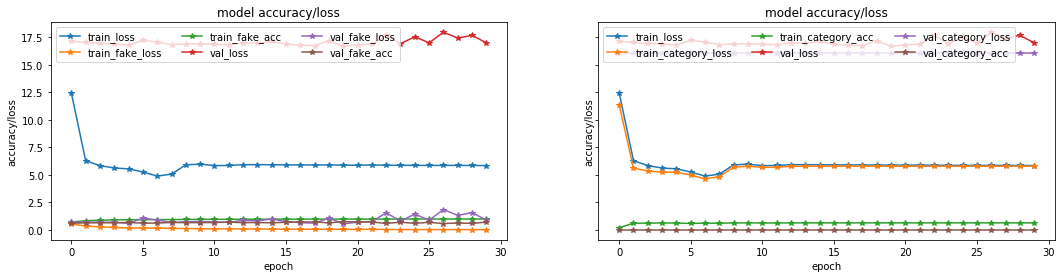


TEST_sz: 1613

Accuracy: 0.755114693118413

              precision    recall  f1-score   support

       truth      0.721     0.907     0.804       891
       rumor      0.832     0.568     0.675       722

   micro avg      0.755     0.755     0.755      1613
   macro avg      0.777     0.737     0.739      1613
weighted avg      0.771     0.755     0.746      1613
 samples avg      0.755     0.755     0.755      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [3]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='End2endTextCNN', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=True)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 118, 256)     230656      embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 117, 256)     307456      embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_9 (

Epoch 15/100
32193/32193 [==============================] - 4s 114us/step - loss: 5.9324 - fake_loss: 0.0754 - category_loss: 5.7927 - fake_acc: 0.9705 - category_acc: 0.6404 - val_loss: 16.6151 - val_fake_loss: 0.4682 - val_category_loss: 16.0831 - val_fake_acc: 0.7812 - val_category_acc: 0.0000e+00
Epoch 16/100
32193/32193 [==============================] - 4s 112us/step - loss: 5.9146 - fake_loss: 0.0610 - category_loss: 5.7917 - fake_acc: 0.9777 - category_acc: 0.6404 - val_loss: 16.9575 - val_fake_loss: 0.8151 - val_category_loss: 16.0828 - val_fake_acc: 0.6689 - val_category_acc: 0.0000e+00
Epoch 17/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.8108 - fake_loss: 0.0582 - category_loss: 5.6940 - fake_acc: 0.9792 - category_acc: 0.6295 - val_loss: 16.9811 - val_fake_loss: 0.8410 - val_category_loss: 16.0828 - val_fake_acc: 0.6689 - val_category_acc: 0.0000e+00
Epoch 18/100
32193/32193 [==============================] - 4s 113us/step - loss: 5.9050 - fak

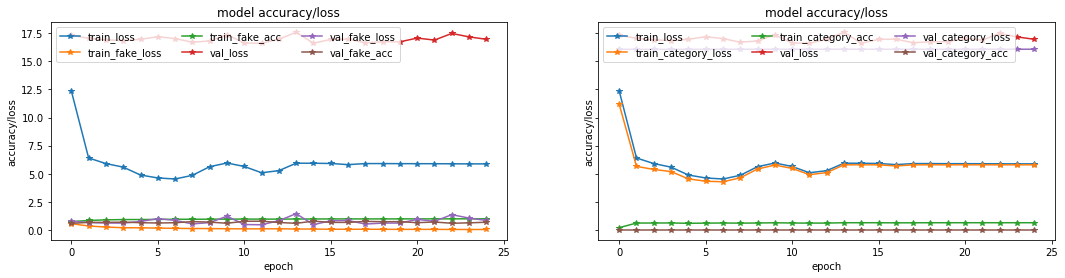


TEST_sz: 1613

Accuracy: 0.7811531308121513

              precision    recall  f1-score   support

       truth      0.773     0.854     0.812       891
       rumor      0.793     0.691     0.739       722

   micro avg      0.781     0.781     0.781      1613
   macro avg      0.783     0.773     0.775      1613
weighted avg      0.782     0.781     0.779      1613
 samples avg      0.781     0.781     0.781      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [4]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='End2endTextCNN2', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=True)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 118, 256)     230656      embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 117, 256)     307456      embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_12 

Epoch 15/100
32193/32193 [==============================] - 4s 112us/step - loss: 5.5949 - fake_loss: 0.0817 - category_loss: 5.4435 - fake_acc: 0.9684 - category_acc: 0.6221 - val_loss: 17.2480 - val_fake_loss: 1.0953 - val_category_loss: 16.0839 - val_fake_acc: 0.6076 - val_category_acc: 0.0000e+00
Epoch 16/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.9324 - fake_loss: 0.0764 - category_loss: 5.7883 - fake_acc: 0.9705 - category_acc: 0.6364 - val_loss: 17.1970 - val_fake_loss: 1.0469 - val_category_loss: 16.0839 - val_fake_acc: 0.6125 - val_category_acc: 0.0000e+00
Epoch 17/100
32193/32193 [==============================] - 4s 112us/step - loss: 5.9230 - fake_loss: 0.0646 - category_loss: 5.7940 - fake_acc: 0.9762 - category_acc: 0.6404 - val_loss: 17.3170 - val_fake_loss: 1.1699 - val_category_loss: 16.0839 - val_fake_acc: 0.5939 - val_category_acc: 0.0000e+00
Epoch 18/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.9201 - fak

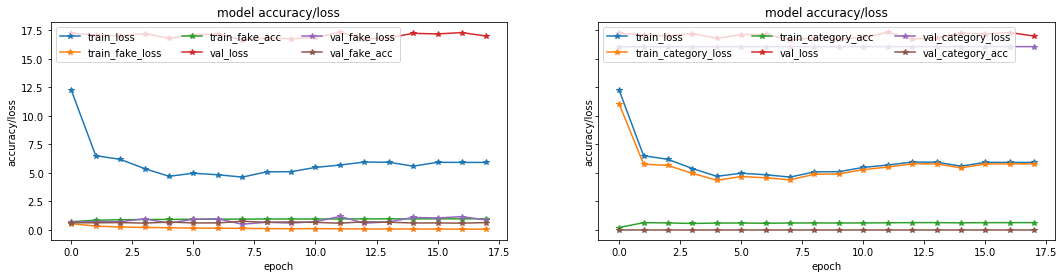


TEST_sz: 1613

Accuracy: 0.7563546187228767

              precision    recall  f1-score   support

       truth      0.728     0.891     0.802       891
       rumor      0.815     0.590     0.684       722

   micro avg      0.756     0.756     0.756      1613
   macro avg      0.771     0.741     0.743      1613
weighted avg      0.767     0.756     0.749      1613
 samples avg      0.756     0.756     0.756      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [5]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='End2endTextCNN3', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=True)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 118, 256)     230656      embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 117, 256)     307456      embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_15 

Epoch 15/100
32193/32193 [==============================] - 3s 108us/step - loss: 5.9254 - fake_loss: 0.0749 - category_loss: 5.7887 - fake_acc: 0.9720 - category_acc: 0.6404 - val_loss: 16.8980 - val_fake_loss: 0.7553 - val_category_loss: 16.0829 - val_fake_acc: 0.6603 - val_category_acc: 0.0000e+00
Epoch 16/100
32193/32193 [==============================] - 4s 112us/step - loss: 5.9122 - fake_loss: 0.0684 - category_loss: 5.7859 - fake_acc: 0.9746 - category_acc: 0.6404 - val_loss: 17.4163 - val_fake_loss: 1.2787 - val_category_loss: 16.0818 - val_fake_acc: 0.5921 - val_category_acc: 0.0000e+00
Epoch 17/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.6193 - fake_loss: 0.0769 - category_loss: 5.4866 - fake_acc: 0.9705 - category_acc: 0.6138 - val_loss: 16.8220 - val_fake_loss: 0.6826 - val_category_loss: 16.0833 - val_fake_acc: 0.6863 - val_category_acc: 0.0000e+00
Epoch 00017: early stopping


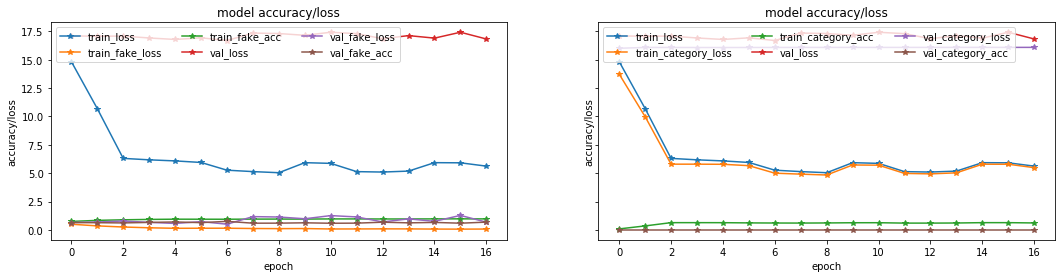


TEST_sz: 1613

Accuracy: 0.7538747675139492

              precision    recall  f1-score   support

       truth      0.725     0.892     0.800       891
       rumor      0.814     0.583     0.680       722

   micro avg      0.754     0.754     0.754      1613
   macro avg      0.770     0.738     0.740      1613
weighted avg      0.765     0.754     0.746      1613
 samples avg      0.754     0.754     0.754      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [6]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='End2endTextCNN4', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=True)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 118, 256)     230656      embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 117, 256)     307456      embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_18 

Epoch 15/100
32193/32193 [==============================] - 4s 112us/step - loss: 5.4560 - fake_loss: 0.0736 - category_loss: 5.3136 - fake_acc: 0.9729 - category_acc: 0.6196 - val_loss: 17.0674 - val_fake_loss: 0.9162 - val_category_loss: 16.0840 - val_fake_acc: 0.6435 - val_category_acc: 0.0000e+00
Epoch 16/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.9311 - fake_loss: 0.0722 - category_loss: 5.7929 - fake_acc: 0.9729 - category_acc: 0.6404 - val_loss: 17.1827 - val_fake_loss: 1.0337 - val_category_loss: 16.0840 - val_fake_acc: 0.6311 - val_category_acc: 0.0000e+00
Epoch 17/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.9141 - fake_loss: 0.0579 - category_loss: 5.7925 - fake_acc: 0.9783 - category_acc: 0.6404 - val_loss: 17.0274 - val_fake_loss: 0.8810 - val_category_loss: 16.0840 - val_fake_acc: 0.6615 - val_category_acc: 0.0000e+00
Epoch 18/100
32193/32193 [==============================] - 4s 110us/step - loss: 5.9098 - fak

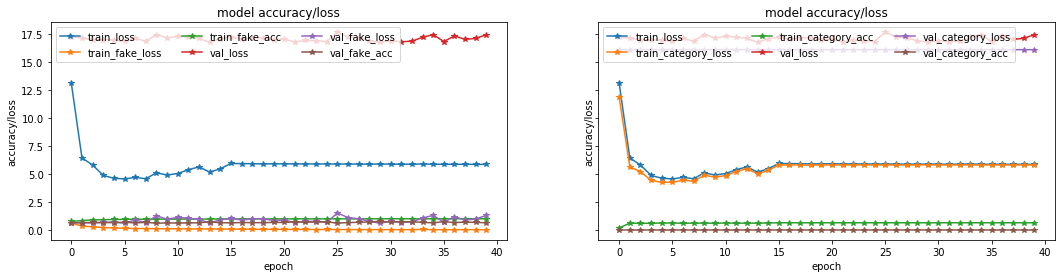


TEST_sz: 1613

Accuracy: 0.7569745815251085

              precision    recall  f1-score   support

       truth      0.723     0.908     0.805       891
       rumor      0.834     0.571     0.678       722

   micro avg      0.757     0.757     0.757      1613
   macro avg      0.778     0.739     0.741      1613
weighted avg      0.773     0.757     0.748      1613
 samples avg      0.757     0.757     0.757      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [7]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='End2endTextCNN5', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=True)